# **Imports**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from tensorflow.keras import layers


import itertools
from itertools import cycle

import itertools
from itertools import cycle

sns.set_style('whitegrid')
# Set the style to whitegrid
plt.style.use('seaborn-whitegrid')
plt.style.library['seaborn-whitegrid']
plt.style.use("seaborn-v0_8-whitegrid")

from matplotlib import rcParams
rcParams['font.weight'] = 'bold'

2024-03-23 10:52:08.611416: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 10:52:08.611478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 10:52:08.612964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_16611/1129899978.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykerne

## Reading Data

In [2]:
# Load data 
data = pd.read_csv('/kaggle/input/milkquality/milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [6]:
# Low (Bad)  , Medium (Moderate) , High (Good)
data=data.replace({'low': 0 , 'medium': 1 , 'high': 2})

/tmp/ipykernel_16611/3898033099.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'low': 0 , 'medium': 1 , 'high': 2})


<Axes: >

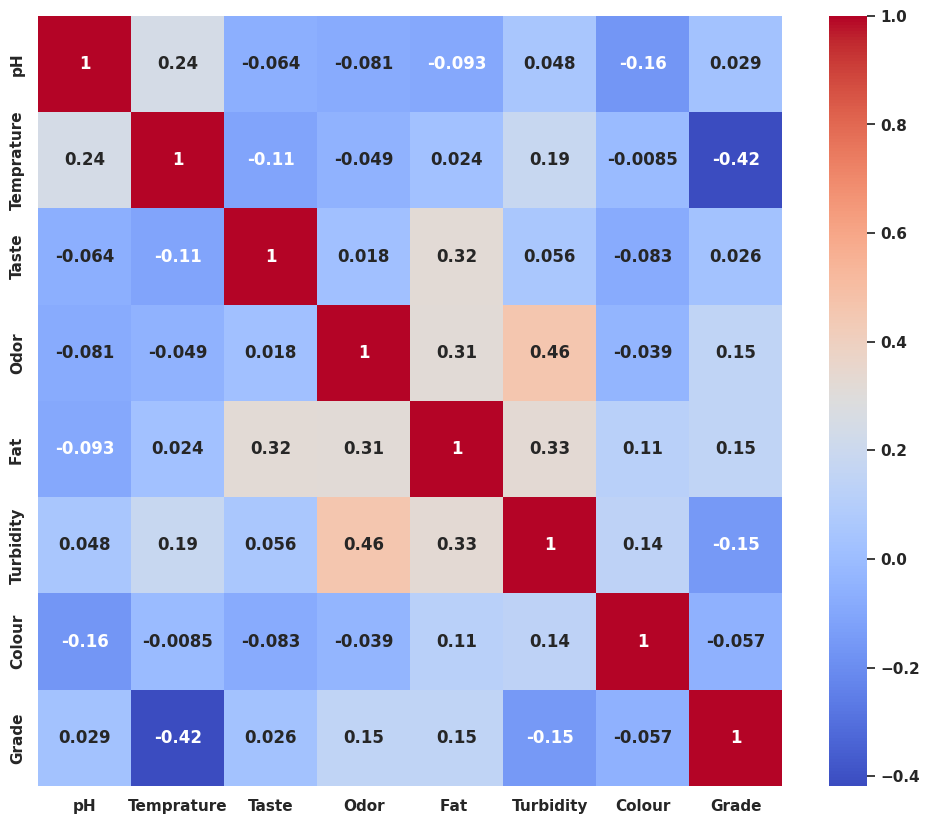

In [7]:
# plotting correlation heatmap
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

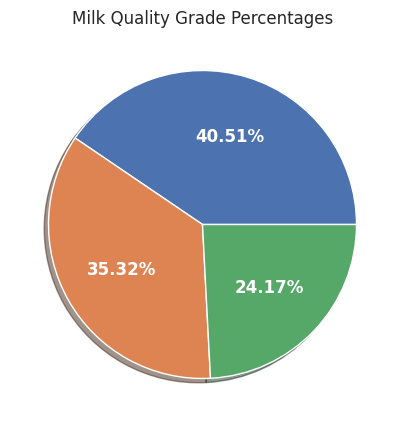

In [8]:
counts = data['Grade'].value_counts()
grade_percentages = [(count/len(data))*100 for count in counts]
grade_label = counts.index.tolist()

plt.figure(figsize=(5,5))
plt.title('Milk Quality Grade Percentages')
plt.pie(grade_percentages, labels=grade_label, autopct='%1.2f%%',shadow=True , textprops={'color': 'white'});

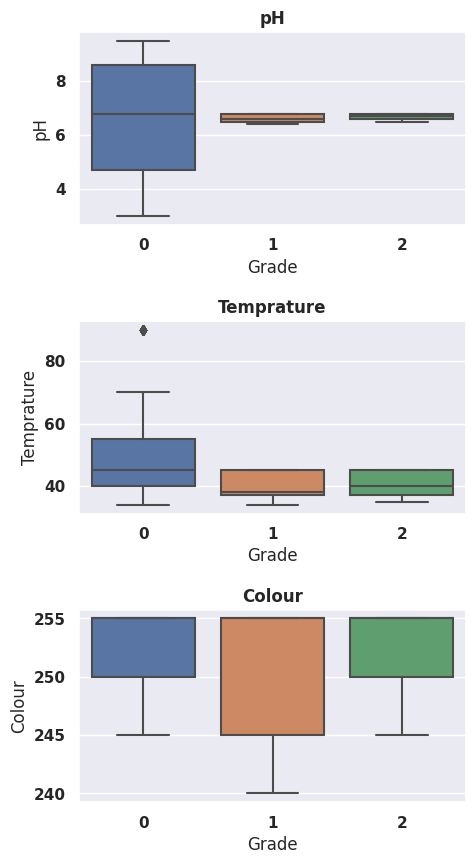

In [9]:
col_list=['pH', 'Temprature', 'Colour']

fig = plt.figure(figsize=(5,10))
# Adjusting the margins
plt.subplots_adjust(hspace=0.5)

for i in range(len(col_list)):
    plt.subplot(3,1,i+1)
    plt.title(col_list[i] , weight = 'bold')
    sns.boxplot(data=data,y=data[col_list[i]],x=data['Grade'])

sns.set_style('whitegrid')


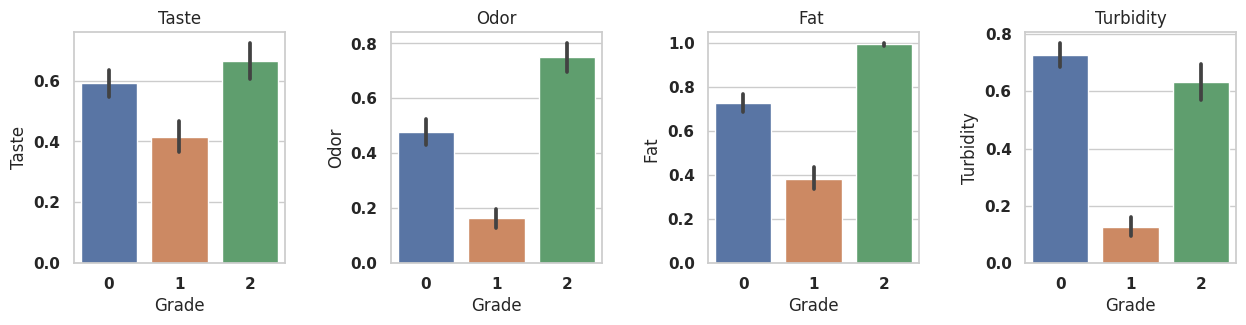

In [10]:
col_list=['Taste', 'Odor', 'Fat ','Turbidity']

fig = plt.figure(figsize=(15,3))
# Adjusting the margins
plt.subplots_adjust(wspace=0.5)

for i in range(len(col_list)):
    plt.subplot(1,4,i+1)
    plt.title(col_list[i])
    sns.barplot(data=data,y=data[col_list[i]],x=data['Grade'])

sns.set_style('whitegrid')


In [11]:
X = data.drop('Grade' , axis = 1)
y = data['Grade']


In [12]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the data
X, y = smote.fit_resample(X, y)

In [13]:
# using standard scaler for normalizing
'''
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = X.select_dtypes(include='number').columns
data = standardization(X,numeric_col)

'''

"\nstd_scaler = StandardScaler()\ndef standardization(df,col):\n  for i in col:\n    arr = df[i]\n    arr = np.array(arr)\n    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))\n  return df\n\nnumeric_col = X.select_dtypes(include='number').columns\ndata = standardization(X,numeric_col)\n\n"

In [14]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the feature data
X = scaler.fit_transform(X)

In [15]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(y)

In [16]:
X=np.array(X)
y=np.array(y)


In [17]:
# splitting the dataset 80% for training , 10% testing and 10% validation
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42 , stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.50, random_state=42 , stratify=y_test)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0] ,  1 , X_train.shape[1] ))
X_train.shape

(1029, 1, 7)

In [19]:
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1] ))
X_test.shape

(129, 1, 7)

In [20]:
X_val = np.reshape(X_val, (X_val.shape[0],1,X_val.shape[1] ))
X_test.shape

(129, 1, 7)

In [21]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)


X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)


In [48]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Bidirectional, Flatten, Add , SimpleRNN , GRU
from keras.optimizers import Adam

def residual_block(x):
    # Define a residual block with two LSTM layers and a skip connection
    y = GRU(units=20, activation='relu', return_sequences=True)(x)
    y = GRU(units=20, activation='relu', return_sequences=True)(y)
    y = Add()([x, y])  # Add skip connection
    return y

# Input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM layers with residual block
x = GRU(units=20, activation='relu', return_sequences=True)(inputs)
x = residual_block(x)
x = GRU(units=20, activation='relu', return_sequences=True)(x)

# Flatten
x = Flatten()(x)

# Dense layers
outputs = Dense(units=3, activation='softmax')(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Define optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1, 7)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 1, 20)     │      1,740 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 1, 20)     │      2,520 │ gru[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_2 (GRU)         │ (None, 1, 20)     │      2,520 │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 1, 20)     │          0 │ gru[0][0],        │
│                     │                   │            │ gru_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_3 (GRU)         │ (None, 1, 20)     │      2,520 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 20)        │          0 │ gru_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │         63 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,363 (36.57 KB)

 Trainable params: 9,363 (36.57 KB)

 Non-trainable params: 0 (0.00 B)

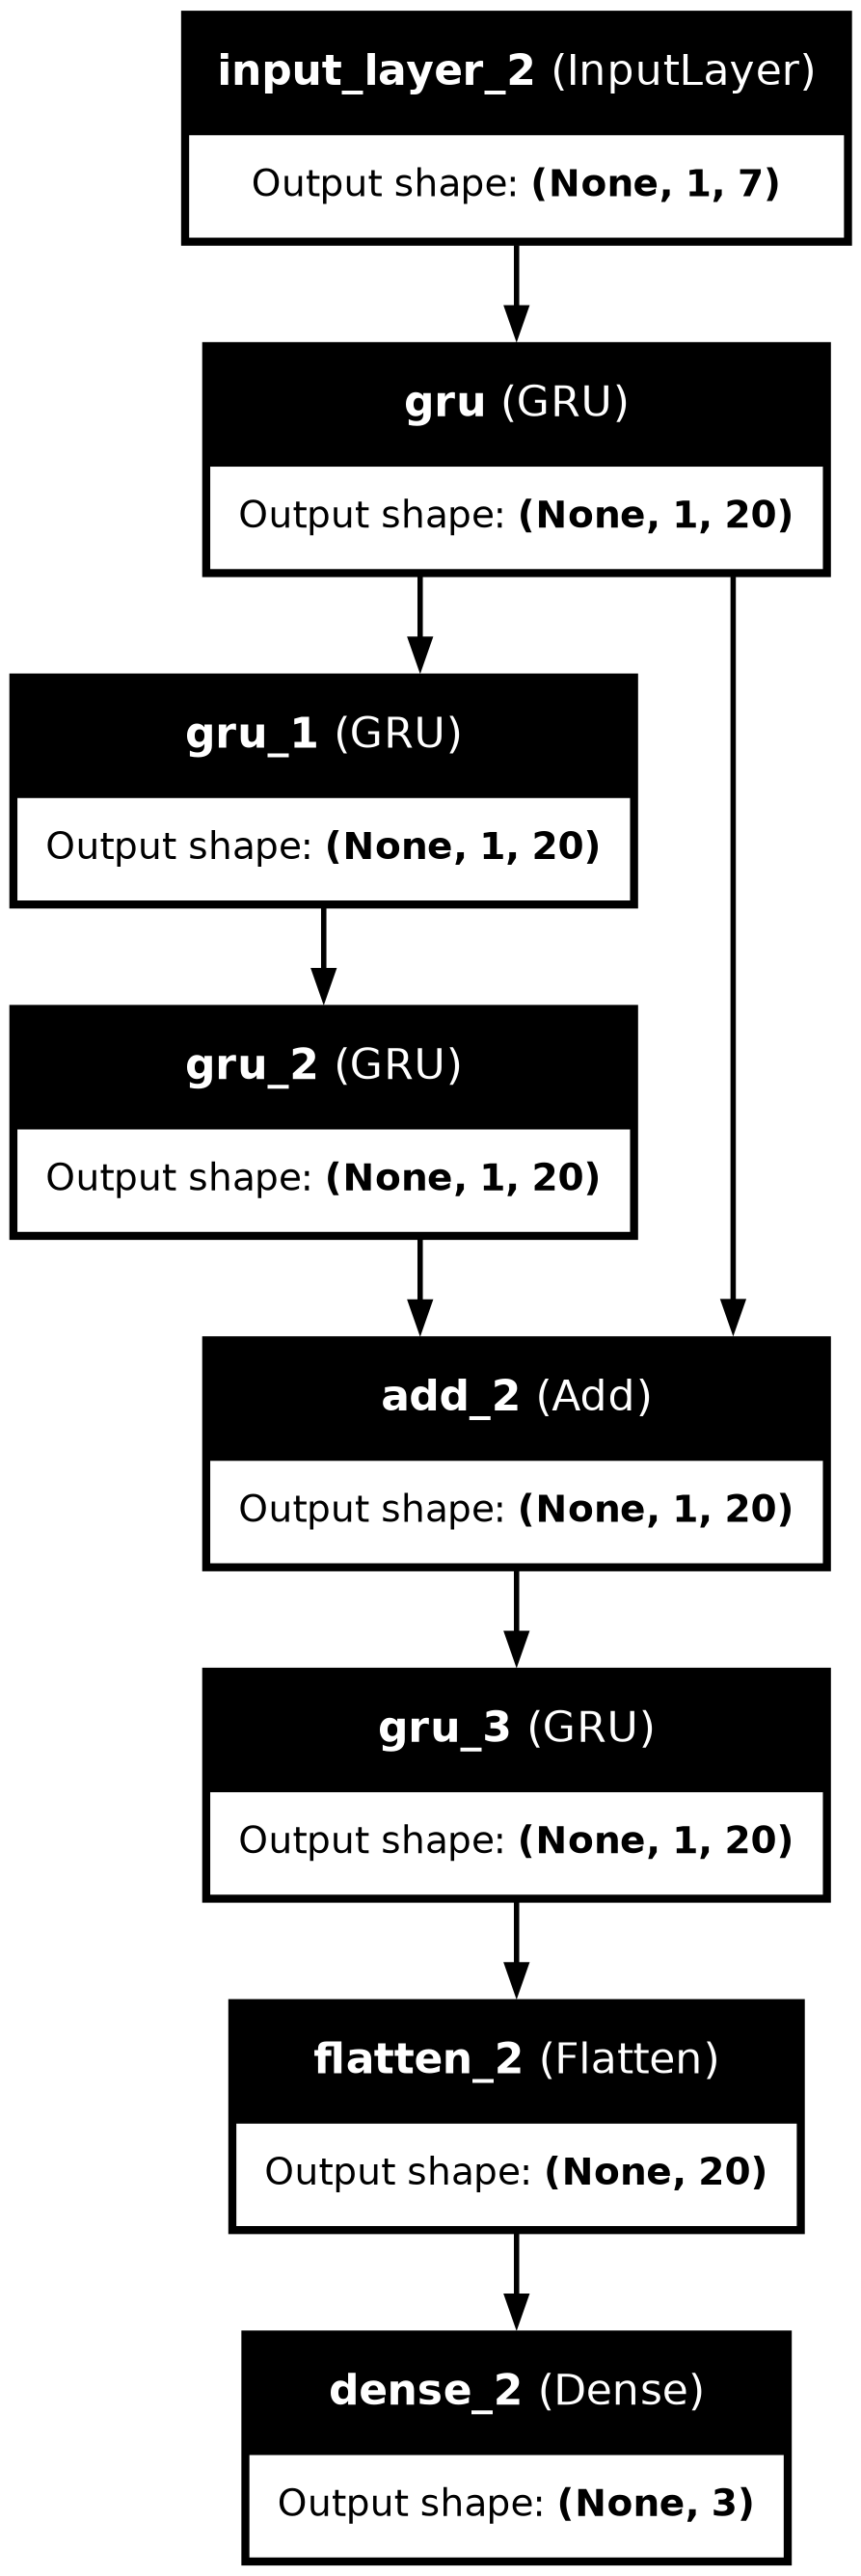

In [49]:
from keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Proposed**

In [50]:
# training the model on training dataset
import time as t
time1 = t.time()
print('Train...')

history = model.fit(X_train, y_train, epochs=70, batch_size=16,validation_data= (X_val , y_val))
time_prposed_model = t.time() - time1
print(f"Total time to train  of  Proposed model is {time_prposed_model}")

Train...
Epoch 1/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.3837 - loss: 1.0966 - val_accuracy: 0.5581 - val_loss: 1.0461
Epoch 2/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 0.9845 - val_accuracy: 0.7519 - val_loss: 0.7825
Epoch 3/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.6219 - val_accuracy: 0.9147 - val_loss: 0.3191
Epoch 4/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9230 - loss: 0.2617 - val_accuracy: 0.9535 - val_loss: 0.1384
Epoch 5/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9355 - loss: 0.1797 - val_accuracy: 0.9535 - val_loss: 0.1054
Epoch 6/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432 - loss: 0.1426 - val_accuracy: 0.9690 - val_loss: 0.0923
Epoch 7/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9493 - loss: 0.1199 - val_accuracy: 0.9690 - val_loss: 0.0944
Epoch 8/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9601 - loss: 0.0933 - val_accuracy: 0.9690 

In [51]:
y_pred_test = model.predict(X_test, batch_size=32)

# For Plot curve
y_pred_evaluation_test = to_categorical(np.argmax(y_pred_test, axis=1), 3)

# For evaluation
y_pred_argmax_test=(np.argmax(y_pred_test, axis=1))

y_test_argmax=(np.argmax(y_test, axis=1))


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step


In [52]:
from sklearn.metrics import roc_auc_score

# Calculating Area under the curve
def AUC(actual_class, pred_class, average="micro"):
    # Making a set of all the unique classes
    unique_class = set(actual_class)
    roc_auc_dict = {}
    total_auc = 0  # Variable to store the total AUC score

    for per_class in unique_class:
        # Making a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        # Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average=average)
        roc_auc_dict[per_class] = roc_auc
        total_auc += roc_auc

    # Calculating the average AUC score for all classes
    average_auc = total_auc / len(unique_class)

    return roc_auc_dict, average_auc

# **Numerical Results Accuracy , Precison , Recall , F1-Score , AUC**

In [53]:
# predicting target attribute on testing dataset
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

precision = precision_score(y_test, y_pred_evaluation_test , average='macro')
recall = recall_score(y_test, y_pred_evaluation_test , average='macro')
f1 = f1_score(y_test, y_pred_evaluation_test , average='macro')

print('AUC Score is on Test : ' , AUC(y_test_argmax, y_pred_argmax_test))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


from sklearn.metrics import classification_report
classes = ['Low (Bad) ' , 'Medium (Moderate) ' , 'High (Good) ']

print("Classification Report on Data Test \n" , classification_report(y_test_argmax, y_pred_argmax_test, target_names=classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0094      
Test results - Loss: 0.01738068461418152 - Accuracy: 99.22480583190918%
AUC Score is on Test :  ({0: 1.0, 1: 0.9941860465116279, 2: 0.9883720930232558}, 0.9941860465116279)
Precision: 0.9924242424242425
Recall: 0.9922480620155039
F1 Score: 0.9922470137480279
Classification Report on Data Test 
                     precision    recall  f1-score   support

        Low (Bad)        1.00      1.00      1.00        43
Medium (Moderate)        0.98      1.00      0.99        43
      High (Good)        1.00      0.98      0.99        43

          accuracy                           0.99       129
         macro avg       0.99      0.99      0.99       129
      weighted avg       0.99      0.99      0.99       129



# **Graphical Results**

In [54]:
def plot_roc_curve(y_test,y_pred):
    n_classes=3
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

    colors = cycle(["aqua", "darkorange", "cornflowerblue",'#9e9e9e','#b19a7e'])
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of  {0} (area = {1:0.2f})".format(classes[i], roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate" , weight='bold')
    plt.ylabel("True Positive Rate" , weight='bold')
    plt.title("Proposed-Roc-Curve" , weight='bold')
    plt.legend(loc="lower right")

    plt.show()

In [55]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title , weight='bold')
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)
	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')
	else:
		print('Confusion Matrix, Without Normalization')
	print(cm)
	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
	plt.tight_layout()
	plt.ylabel('Actual Label' , weight='bold')
	plt.xlabel('Predicted Label' , weight='bold')

In [56]:
def Acc_Loss_Graph(history):
    # converting hsitory to dataframe
    pd.DataFrame(history.history)

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
    plt.title('Proposed-Model Accuracy' , weight='bold')
    plt.xlabel('Epochs' , weight='bold')
    plt.ylabel('Accuracy' , weight='bold')
    plt.legend()
    plt.show()

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    plt.title('Proposed-Model Loss' , weight='bold')
    plt.xlabel('Epochs' , weight='bold')
    plt.ylabel('loss' , weight='bold')
    plt.legend()
    plt.show()

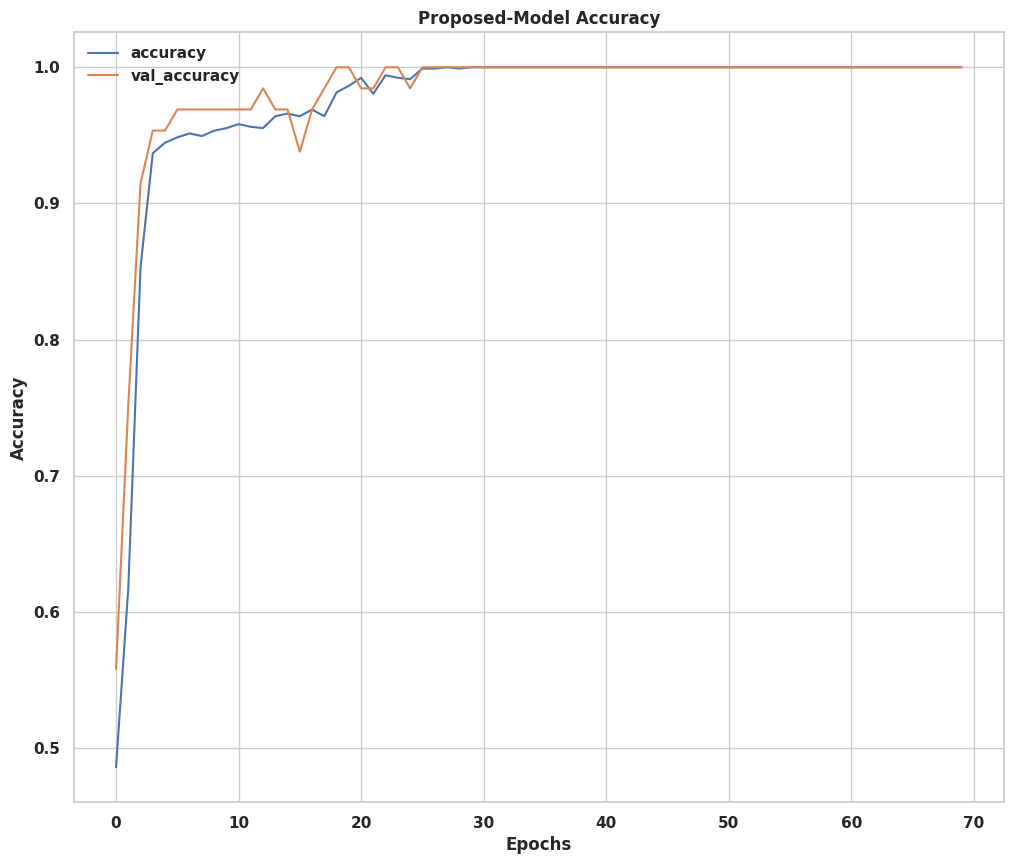

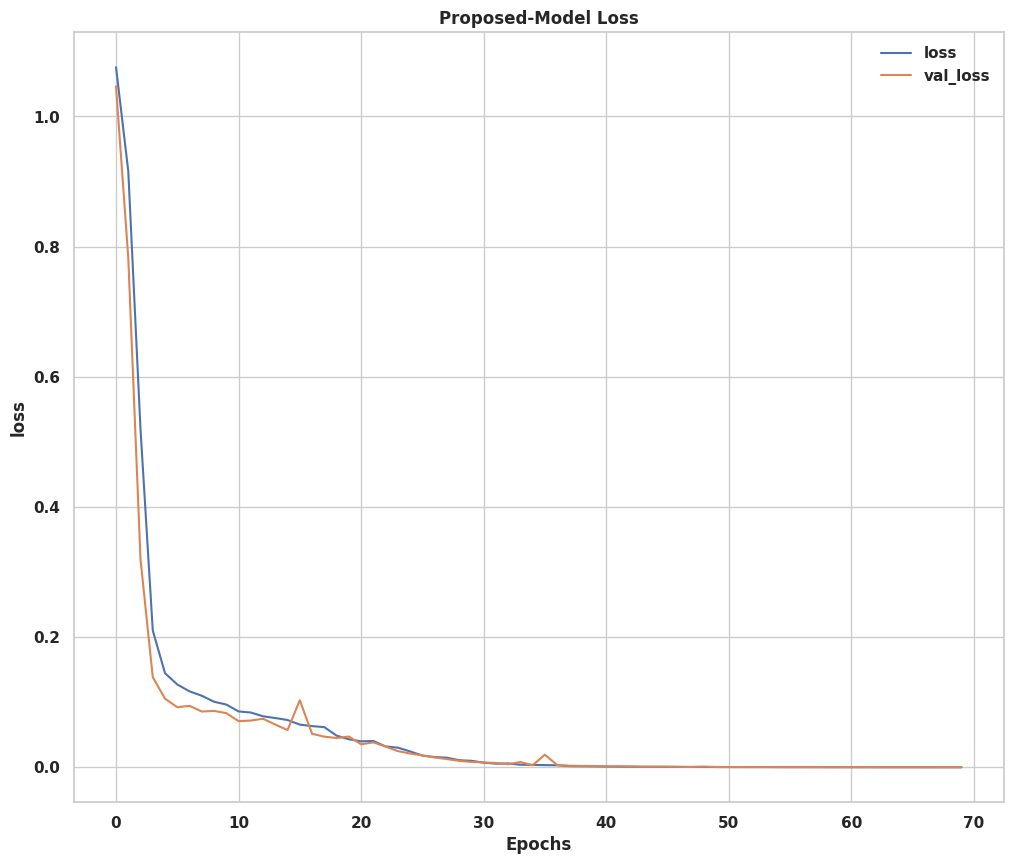

In [57]:
Acc_Loss_Graph(history)

Confusion Matrix, Without Normalization
[[43  0  0]
 [ 0 43  0]
 [ 0  1 42]]


<Figure size 700x700 with 0 Axes>

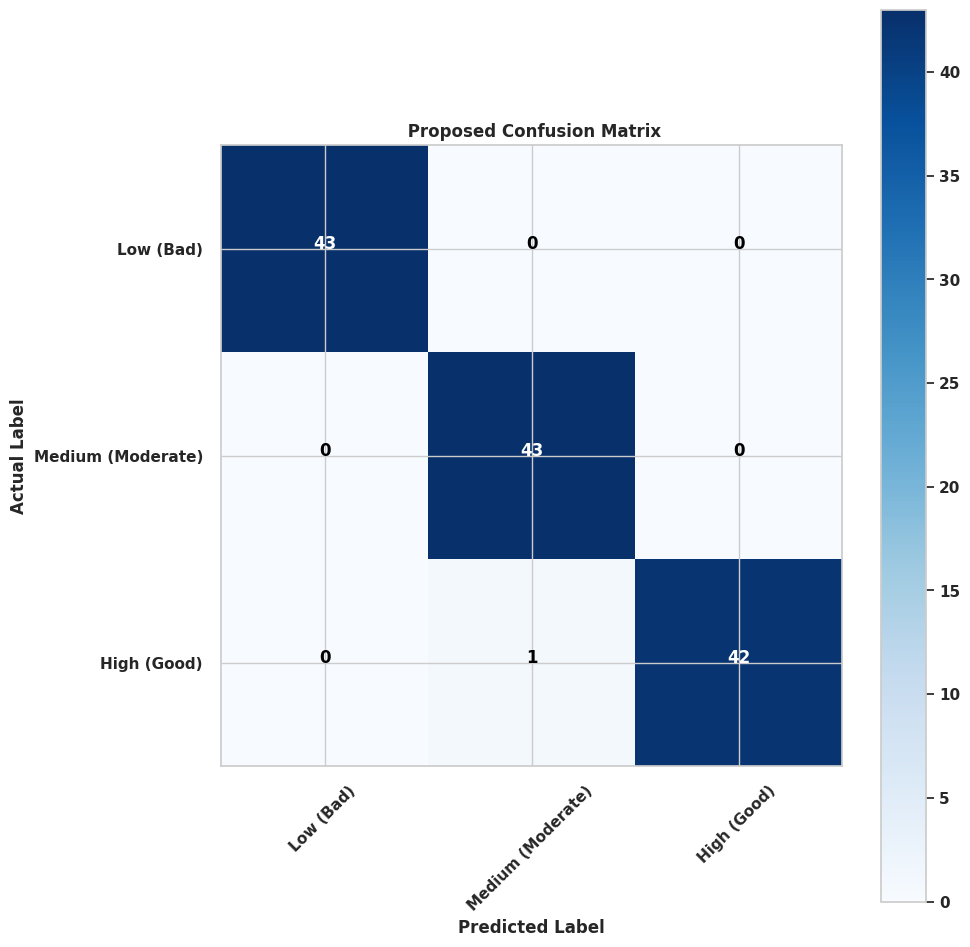

In [58]:
# Plot confusion matrix
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_argmax, y_pred_argmax_test)
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cm=cm, classes=classes, title=' Proposed Confusion Matrix')

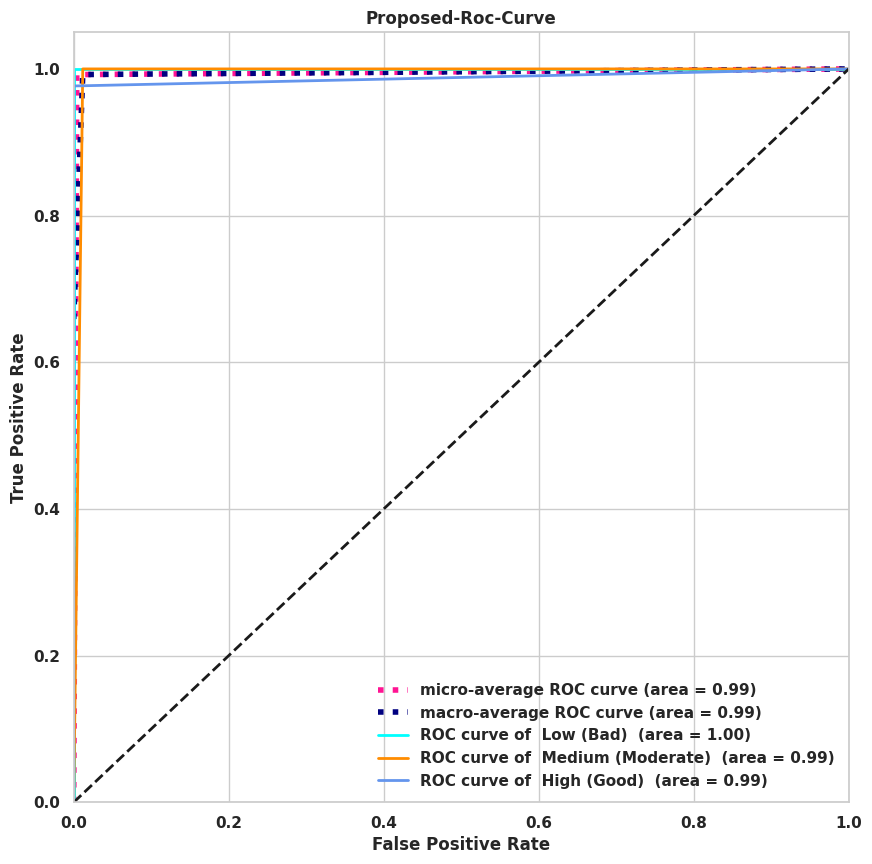

In [61]:
plot_roc_curve(y_test,y_pred_evaluation_test)

/tmp/ipykernel_16611/1428936084.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['High (Good) ' 'High (Good) ' 'Low (Bad) ' 'Medium (Moderate) '
 'Medium (Moderate) ' 'Medium (Moderate) ' 'High (Good) '
 'Medium (Moderate) ' 'Medium (Moderate) ' 'Low (Bad) '
 'Medium (Moderate) ' 'Medium (Moderate) ' 'Low (Bad) ' 'High (Good) '
 'Low (Bad) ' 'Low (Bad) ' 'Low (Bad) ' 'Medium (Moderate) '
 'Medium (Moderate) ' 'Medium (Moderate) ' 'Low (Bad) '
 'Medium (Moderate) ' 'High (Good) ' 'High (Good) ' 'High (Good) '
 'Low (Bad) ' 'Medium (Moderate) ' 'High (Good) ' 'High (Good) '
 'Medium (Moderate) ' 'High (Good) ' 'Low (Bad) ' 'Low (Bad) '
 'Low (Bad) ' 'High (Good) ' 'High (Good) ' 'Low (Bad) '
 'Medium (Moderate) ' 'Low (Bad) ' 'Medium (Moderate) ' 'High (Good) '
 'Low (Bad) ' 'Low (Bad) ' 'Low (Bad) ' 'Low (Bad) ' 'Medium (Moderate) '
 'High (Good) ' 'Medium (Moderate) ' 'High (Good) ' 'Medium (Moderate) '
 'Medi

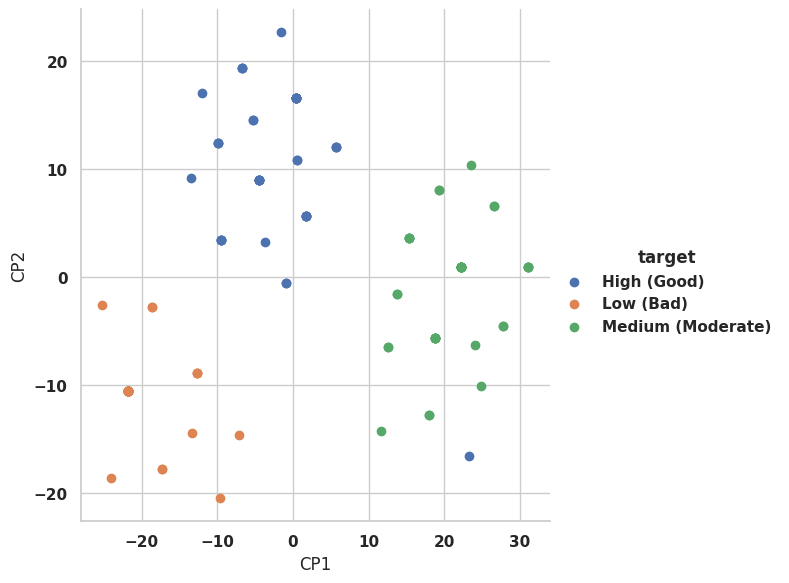

In [59]:
from sklearn.manifold import TSNE
tsne2 = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(y_pred_test)

# create dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((tsne2, y_test_argmax)))# cast targets column to int

target_name = {0:'Low (Bad) ',
               1:'Medium (Moderate) ',
               2:'High (Good) ',
              
             }

cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.loc[:, 'target'] = cps_df.target.map(target_name)

import seaborn as sns
grid = sns.FacetGrid(cps_df, hue="target", height=6)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

In [60]:
model.save("milkquality_weights_proposed.h5")